<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/main/9_58_Plancks_Law_Raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrating Planck's equation in terms of power per unit area**
---



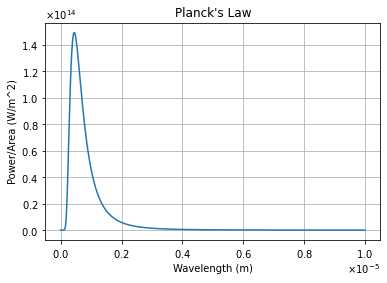

6500.0 Kelvins
Integrated Intensity:  1.011679E+08 W/m^2
Estimated Error:  6.007454E-03 W/m^2
Estimated Stefan-Boltzmann Constant:  5.667472E-08 W/m^2/K^4
Compare to literature: 5.670400E-8 W/m^2/K^4
Percent difference:  -5.118E-02 %


In [1]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.

# Defined variables
T = 6500.0 #Temperature in (Kelvin)
lmin = 1.0E-9 #Minimum wavelength to plot (meters)
lmax = 1.0E-5 #Maximum wavelength to plot (meters)
steps = 500 #number of points to plot
l = np.linspace(lmin, lmax, steps) #range variable for plot

#Define Planck's equation as a function
def dE(l, T):
   return 2*constants.pi*constants.h*constants.c**2/l**5*(1/(np.exp(np.float128(constants.h*constants.c/(l*constants.k*T)))-1)) 
   #note that the exponetial argument is too large to be evaluated with a 64-bit exp, so changed to 128-bit.

#Plot Planck's equation at temperature T.
fig = plt.figure()
ax = plt.axes()
ax.plot(l, dE(l, T))
ax.set(xlabel='Wavelength (m)', ylabel='Power/Area (W/m^2)',
       title="Planck's Law")
ax.grid()
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()

E = integrate.quad(dE, 0, lmax, args=(T))
print(T, "Kelvins") 
print("Integrated Intensity: ", "%10.6E"% E[0], "W/m^2")
print("Estimated Error: ", "%10.6E"% E[1], "W/m^2")

sigma = E[0]/T**4
PercentDeltasigma = (sigma-constants.sigma)/constants.sigma*100

print("Estimated Stefan-Boltzmann Constant: ", "%10.6E"% sigma, "W/m^2/K^4")
print("Compare to literature: 5.670400E-8 W/m^2/K^4")
print("Percent difference: ", "%10.3E"% PercentDeltasigma, "%")
